<a href="https://colab.research.google.com/github/SeminiNethra/Student-Enrollment-Process-Analysis/blob/main/Student_Enrollment_Process_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Load Dataset**

In [2]:
# Replace with your actual path
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')


**Exploratory Data Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min 

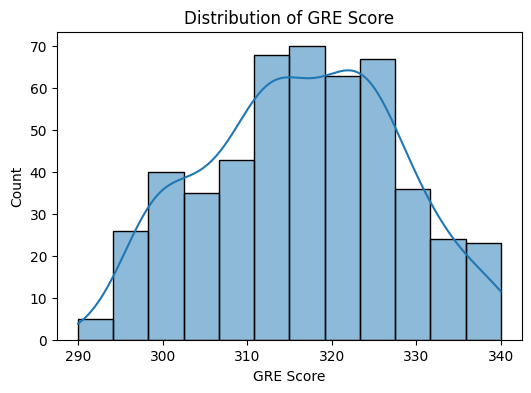

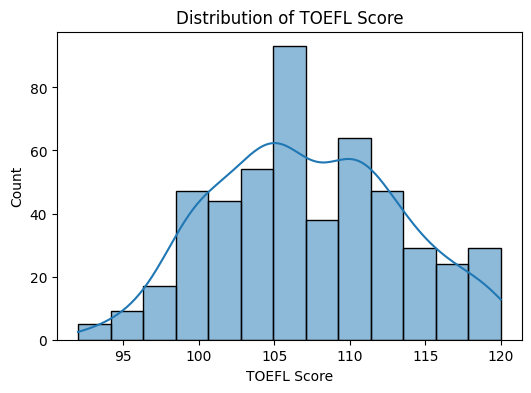

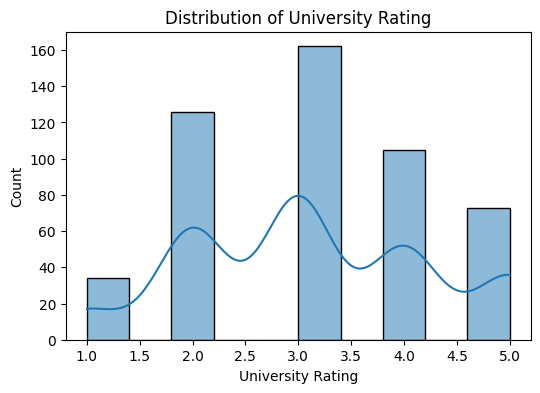

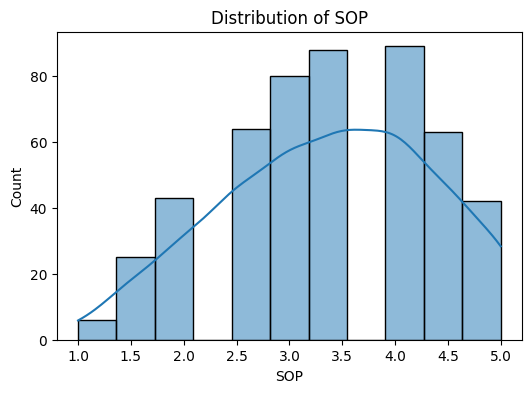

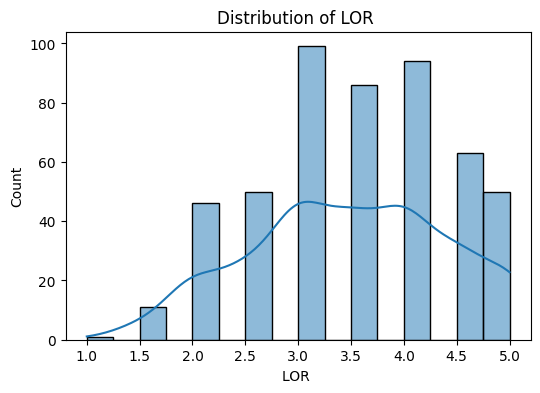

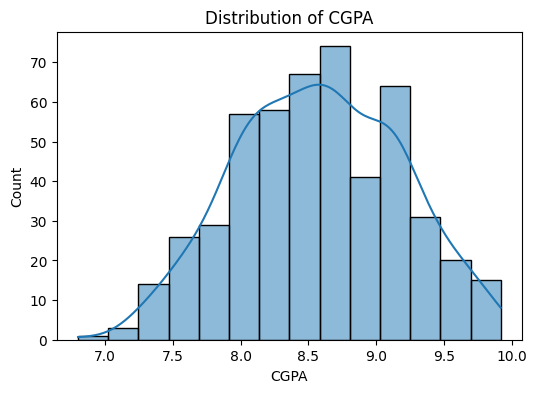

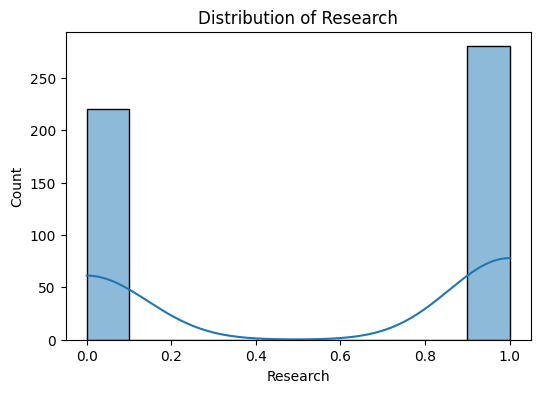

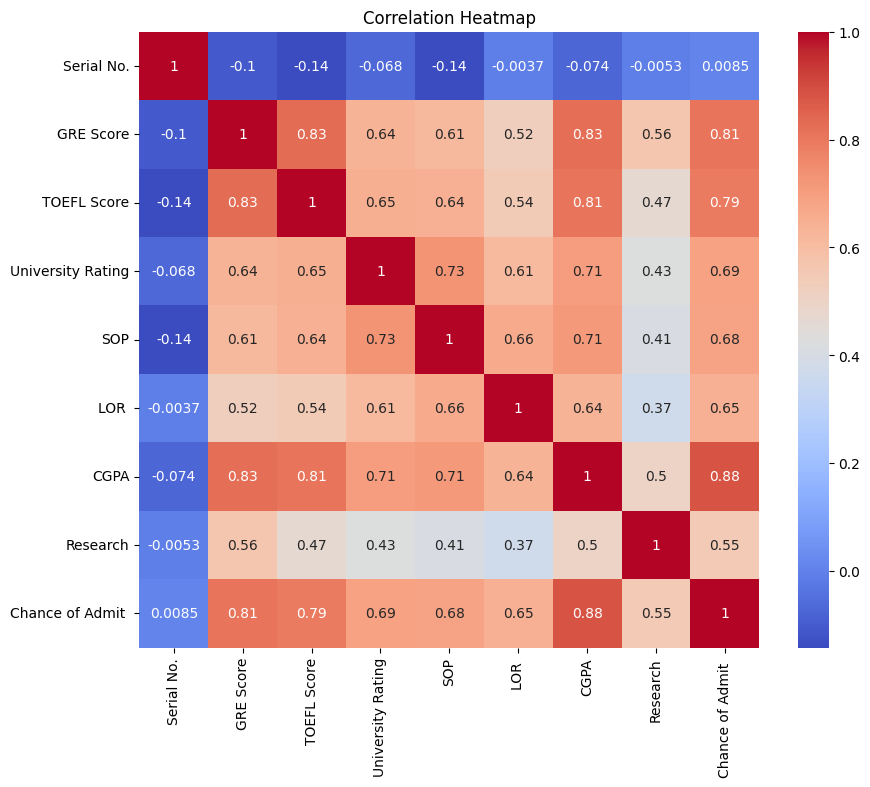

In [3]:
# Overview of the data
print(df.info())
print(df.describe())

# Visualize distributions
for col in df.columns[1:-1]:  # Exclude Serial No. and Chance of Admit for now
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Data Preprocessing**

In [4]:
# Drop 'Serial No.' column if present
if 'Serial No.' in df.columns:
    df = df.drop('Serial No.', axis=1)

# Check for missing values
print(df.isnull().sum())


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


**Feature Selection and Train-Test Split**

In [5]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Model Building: Linear Regression**

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

 **Prediction and Evaluation**

R^2 Score: 0.825630603991949
MSE: 0.0036342178012511066


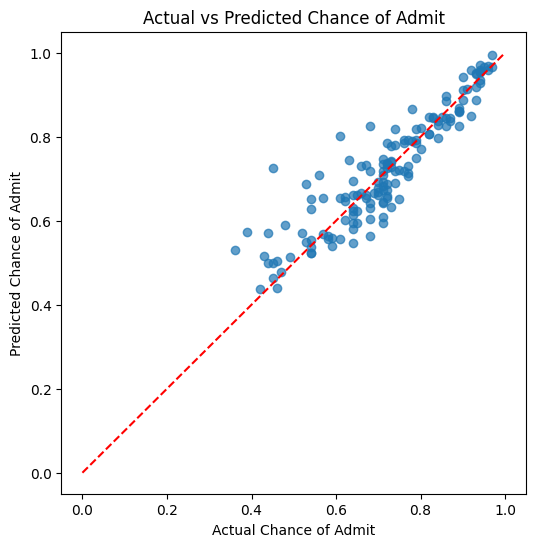

In [7]:
y_pred = lr.predict(X_test)

# R^2 Score
print("R^2 Score:", r2_score(y_test, y_pred))

# Mean Squared Error
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.plot([0,1], [0,1], 'r--')
plt.show()


**Feature Importance**

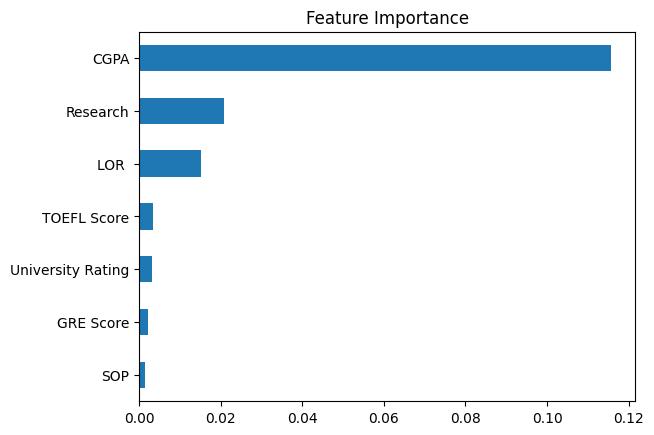

In [8]:
# For linear regression, coefficients indicate importance
importance = pd.Series(lr.coef_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
